In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

# Basic Questions

### How big is the data?

In [3]:
df.shape

(891, 12)

### How does the data look?

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### What is the data type of columns?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Is there any null value?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age,Cabin and Embarked columns contains missing values. We can fill age and embarked using imputer, but cabin contains too many missing values, if this column fails to show correlation with target column, it's better to drop it.

### Is there any duplicate value?

In [7]:
df.duplicated().sum()

0

### How does data look mathematically?

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### How is the correlation between columns?

<AxesSubplot:>

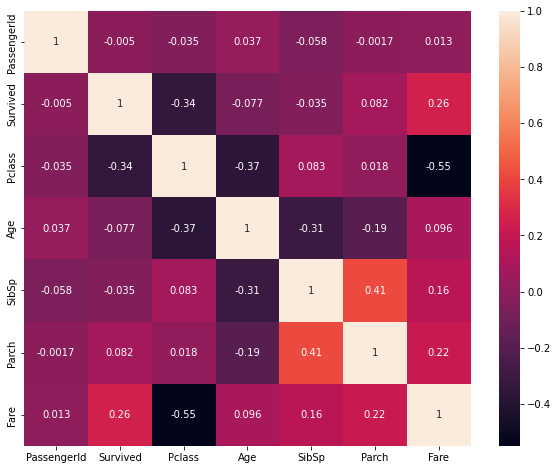

In [9]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

Survived-Fare, SibSp-Parch, show positive correlation.<br>
Pclass-Fare, Pclass-Age, Pclass-Survived show negative correlation.

# Exploratory Data Analysis

### How many passengers survived, how many died?

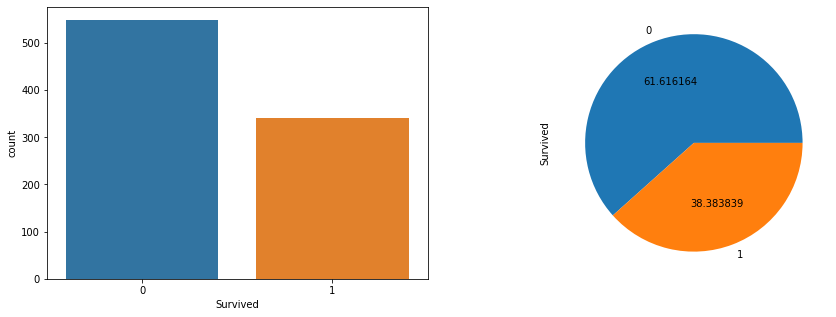

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x="Survived", data=df, ax=ax[0])
df['Survived'].value_counts().plot(kind="pie", autopct="%2f", ax=ax[1])
plt.show()

The probability of dying is much larger than probability of survival. Around 62% passenger died. Only 38% passengers were able to survive.<br>
Base Model = 0 survivors (62% accurate)

### Passenger gender distribution

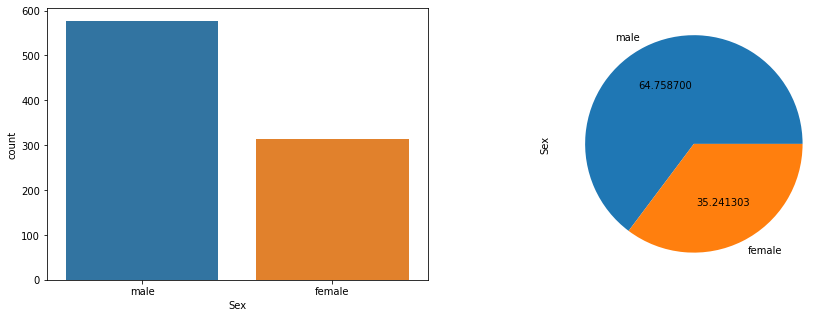

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="Sex", data=df, ax=ax[0])
df['Sex'].value_counts().plot(kind="pie", autopct="%2f", ax=ax[1])
plt.show()

35% passenger were female and around 65% were male passengers.

### Is survival probability effected by gender?

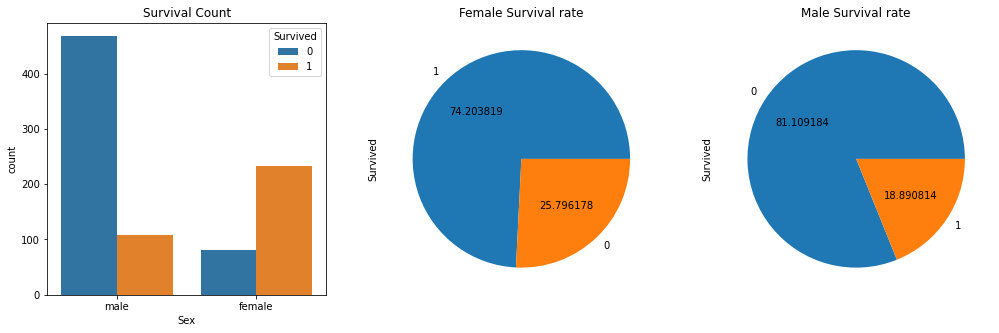

In [12]:
fig, ax = plt.subplots(1,3, figsize=(17,5))
sns.countplot(x="Sex", data=df, hue="Survived", ax=ax[0])
ax[0].set_title('Survival Count')
tf = df[df['Sex']=='female']
tf['Survived'].value_counts().plot(kind='pie', autopct="%2f", ax=ax[1])
ax[1].set_title('Female Survival rate')
tf = df[df['Sex']=='male']
tf['Survived'].value_counts().plot(kind='pie', autopct="%2f", ax=ax[2])
ax[2].set_title('Male Survival rate')
plt.show()

Even though female were less but still 74% of female passenger survived whereas only 18% male passenger survived.<br>
Improved Model = All female survived and all male died

### How is survival rate effected by embarked station and passenger class?

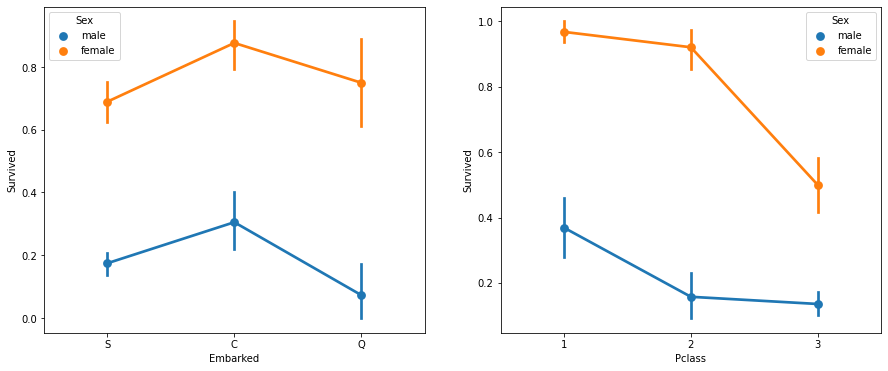

In [13]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
sns.pointplot(x='Embarked', y='Survived', hue='Sex', data=df, ax=ax[0])
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=ax[1])
#sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df)
plt.show()

Almost all male passenger who embarked from Q died. Almost all females embarking from C survived.<br>
Almost all women traveling in Pclass 1 and Pclass 2 survived and almost all men travelling in Pclass 2 and Pclass 3 died.

### How does Age and Fare effect survival rate?

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

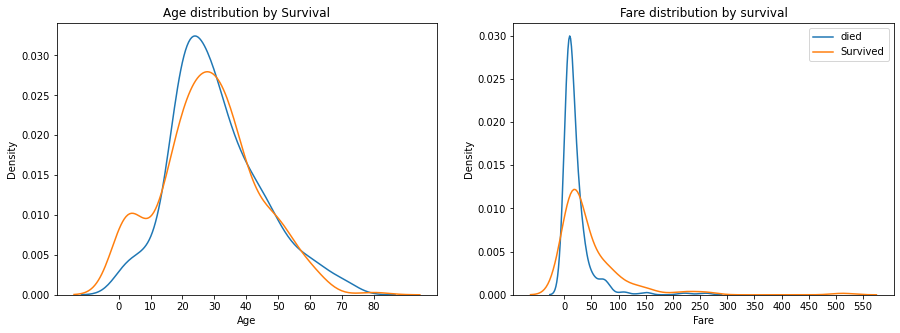

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df[df['Survived']==0]['Age'], hist=False, label='died', ax=ax[0])
sns.distplot(df[df['Survived']==1]['Age'], hist=False, label='survived', ax=ax[0])
ax[0].set_title('Age distribution by Survival')
ax[0].set_xticks(range(0,90,10))

sns.distplot(df[df['Survived']==0]['Fare'], hist=False, label='died', ax=ax[1])
sns.distplot(df[df['Survived']==1]['Fare'], hist=False, label='Survived', ax=ax[1])
ax[1].set_xticks(range(0,600,50))
ax[1].set_title('Fare distribution by survival')
plt.legend()
plt.show()

The survival probability of kids of age group 0-10 is greater than death probability, and the death probability is greater than survival probability in age group 18-30 and age greater than 65.<br>
The death probability of passengers who paid fare between 0 to 30 is very high. Higher fare is giving a higher survival probability.

### How does number of family member effect survival probability?

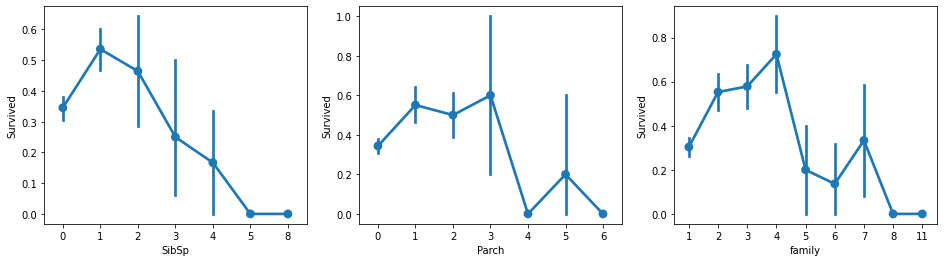

In [16]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.pointplot(x='SibSp', y='Survived', data=df, ax=ax[0])
sns.pointplot(x='Parch', y='Survived', data=df, ax=ax[1])

df['family'] = df['SibSp'] + df['Parch'] + 1
sns.pointplot(x='family', y='Survived', data=df, ax=ax[2])
plt.show()
df = df.drop('family',axis=1)

Having more than 3 Sibling/Spouse or Parent/Children leads to a lower survival probability<br>
Even when these two columns are combined into 1 'family' column, we still observe that survival probability increases upto 3 family members. The newly created family column, doesn't increase the correlation, so it's better to drop it.

### QQ plot to check normal distribution

In [17]:
import scipy.stats as stats

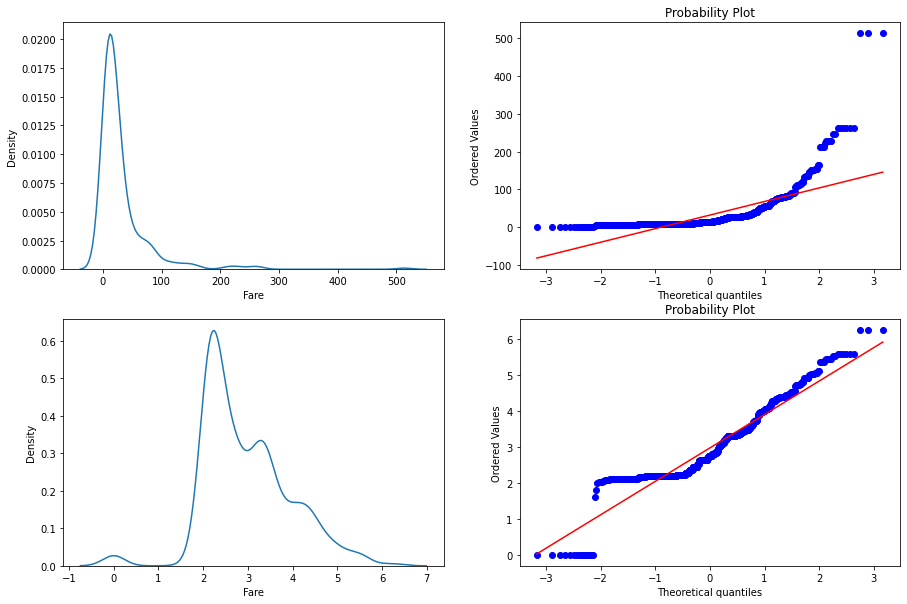

In [18]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.kdeplot(df['Fare'], ax=ax[0][0])
stats.probplot(df['Fare'], dist="norm", plot=ax[0][1])
sns.kdeplot(np.log1p(df['Fare']), ax=ax[1][0])
stats.probplot(np.log1p(df['Fare']), dist="norm", plot=ax[1][1])
plt.show()

Fare column is highly skewed, it can be fixed by log transformation.

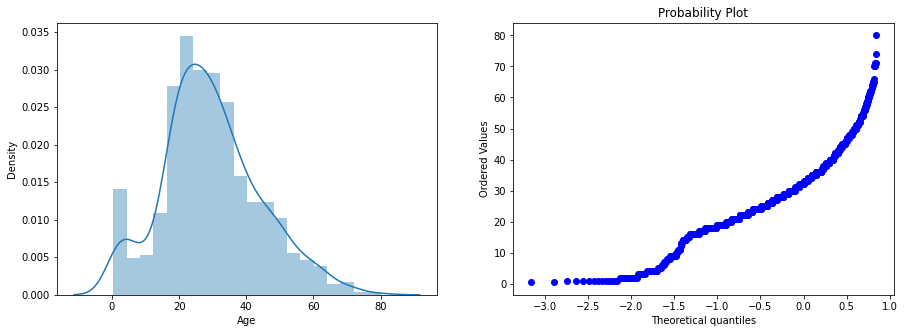

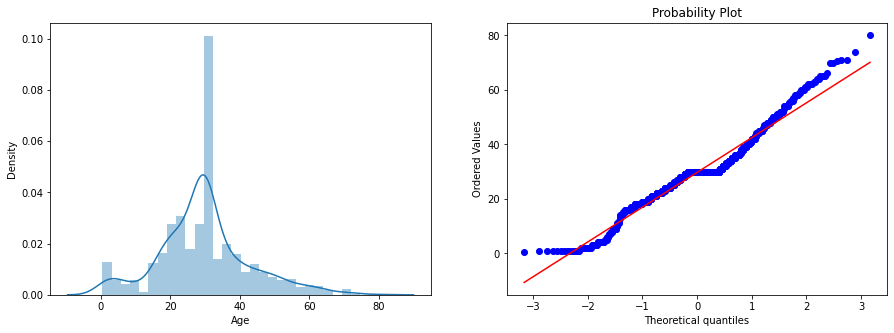

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Age'], ax=ax[0])
stats.probplot(df['Age'], dist='norm', plot=ax[1])
plt.show()

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Age'].fillna(df['Age'].mean()), ax=ax[0])
stats.probplot(df['Age'].fillna(df['Age'].mean()), dist='norm', plot=ax[1])
plt.show()

Complete Case Analysis is not an option, but imputing the age column with the mean age value significantly alters the distribution.

# Outliers

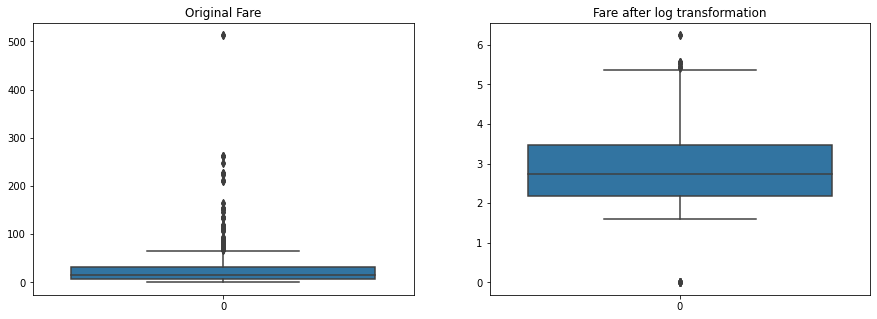

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Original Fare')
sns.boxplot(df['Fare'], ax=ax[0])
ax[1].set_title('Fare after log transformation')
sns.boxplot(np.log1p(df['Fare']), ax=ax[1])
plt.show()

Due skewed data, fare originally contained a large number of outliers, but on applying log transformation the number of outliers are reduced. We can further reduce the outliers by custom binning or capping.

# Preprocessing

In [21]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), 
                                                    df['Survived'], 
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape

(712, 7)

In [24]:
X_train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
41,2,female,27.0,1,0,21.0000,S
748,1,male,19.0,1,0,53.1000,S
864,2,male,24.0,0,0,13.0000,S
552,3,male,NaN,0,0,7.8292,Q
697,3,female,NaN,0,0,7.7333,Q


## Plan
Use log FunctionTransformer on 'fare' to make it normally distributed<br>
Use SimpleImputer on 'age', 'embarked' to fill missing values<br>
Use OneHotEncoder on 'sex', 'embarked'<br>
Use StandardScaler on all columns<br>
Pass the data through linear regression model

## Building Column Transformers

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Initially Function Transformer was 3rd step in pipeline, but np.log1p doesn't work with column index

In [26]:
#function transformer
tft1 = ColumnTransformer([
    ('log_fare', FunctionTransformer(np.log1p),['Fare'])
], remainder='passthrough')

In [27]:
#imputation transformer
tft2 = ColumnTransformer([
    ('impute_age', SimpleImputer(),[3]),
    ('impute_embarked', SimpleImputer(strategy='most_frequent'),[6])
], remainder='passthrough')

In [28]:
#One hot encoding
tft3 = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'),[1,4])
], remainder='passthrough')

In [29]:
#Scaling transformer
tft4 = ColumnTransformer([
    ('scale', StandardScaler(),slice(0,8))
])

In [30]:
#Model
tft5 = LogisticRegression()

# Building Pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([
    ('tft1', tft1),
    ('tft2', tft2),
    ('tft3', tft3),
    ('tft4', tft4),
    ('tft5', tft5)
])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tft1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_fare',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Fare'])])),
                ('tft2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [3]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('tft3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4])])),
                ('tft4',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('tft5', LogisticRegression())])

# Accuracy and Validation

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
y_pred = pipe.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [37]:
print("LR",np.mean(cross_val_score(pipe,X_test,y_test,scoring='accuracy',cv=10)))

LR 0.7937908496732027


Things which can improve the accuracy:-<br>
    1. Use Name column to take out title and proper utilisation of cabin column<br>
    2. Family binning (single, small family and big family)<br>
    3. Fare binning (death rate is very low for passengers with fare greater than 100)<br>
    4. curse of features - family can replace two columns(SibSp and Parch), try reducing no. of features<br>
    5. Check with other machine learning models

# Export Model

In [38]:
import pickle

In [39]:
pickle.dump(pipe, open('pipe.pkl','wb'))